In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


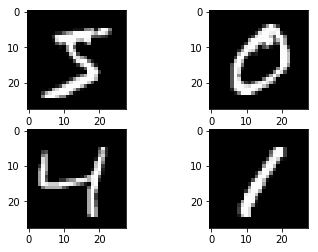

In [2]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

plt.show()

In [3]:
import numpy as np

# understanding the datastructure
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))
print(y_train)
print(y_test)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 ..., 5 6 8]
[7 2 1 ..., 4 5 6]


In [4]:
# correct dimensions of X
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T
print(np.shape(X_train))
print(np.shape(X_test))
print(X_train)
print(X_test)

(784, 60000)
(784, 10000)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [5]:
# correct dimensions of Y
m_train = X_train.shape[1]
m_test = X_test.shape[1]
print(m_train)
print(m_test)

Y_train = np.zeros((10, m_train))
Y_test = np.zeros((10, m_test))

for i in range(m_train):
    Y_train[y_train[i], i] = 1
for i in range(m_test):
    Y_test[y_test[i], i] = 1

print(np.shape(Y_train))
print(np.shape(Y_test))  
print(Y_train)
print(Y_test)

60000
10000
(10, 60000)
(10, 10000)
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [6]:
# unstandardised data
np.set_printoptions(threshold=np.inf)
# print(X_train[100])

In [7]:
# standardised data
X_train = X_train/255
X_test = X_test/255
# print(X_train[100])
np.set_printoptions(threshold=1000)

In [8]:
np.random.seed(2303)

In [9]:
def init(layer_dims):
    #map
    parameters = {}
    L = len(layer_dims)
    for i in range(1, L):
        parameters['W'+str(i)] = np.random.randn(layer_dims[i], layer_dims[i-1])*0.01
        parameters['b'+str(i)] = np.zeros((layer_dims[i], 1))
    return parameters

In [10]:
parameters = init([5, 4, 3])
print(parameters["W1"])
print(parameters["b1"])
print(parameters)

[[-0.00484501  0.00387167 -0.01666614 -0.01205986 -0.00398059]
 [ 0.00155313  0.0092462  -0.00508466 -0.00637779  0.01823601]
 [ 0.00723364  0.01589077 -0.00374115  0.00383509 -0.01571632]
 [-0.00435936  0.00131329  0.01021689 -0.0257823   0.01058946]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
{'W1': array([[-0.00484501,  0.00387167, -0.01666614, -0.01205986, -0.00398059],
       [ 0.00155313,  0.0092462 , -0.00508466, -0.00637779,  0.01823601],
       [ 0.00723364,  0.01589077, -0.00374115,  0.00383509, -0.01571632],
       [-0.00435936,  0.00131329,  0.01021689, -0.0257823 ,  0.01058946]]), 'b1': array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.]]), 'W2': array([[ 0.01846533, -0.00599272,  0.00880805, -0.00917375],
       [-0.00959535,  0.0109254 ,  0.0062414 ,  0.00982684],
       [ 0.02247013,  0.00042942, -0.00102507,  0.00221601]]), 'b2': array([[ 0.],
       [ 0.],
       [ 0.]])}


In [11]:
def sigmoid(Z):
    X = (1/(1+np.exp(-Z)))
    return X

In [12]:
print(sigmoid(np.array([5, 4, 3])))

[ 0.99330715  0.98201379  0.95257413]


In [13]:
def relu(Z):
    X = np.maximum(0, Z)
    return X

In [14]:
print(relu(np.array([5, -4, 3])))

[5 0 3]


In [15]:
def forward(A, W, b, activation):
    Z = np.dot(W, A)+b
    if activation == "sigmoid":
        A = sigmoid(Z)
    elif activation == "relu":
        A = relu(Z)
    return A, Z

In [16]:
def forward_L(X, parameters):
    prev_results = {}
    A = X
    L = len(parameters)//2
    
    for i in range(1, L):
        A, Z = forward(A, parameters['W'+str(i)], parameters['b'+str(i)], "relu")
        prev_results['Z'+str(i)] = Z
        prev_results['A'+str(i)] = A
    
    AL, Z = forward(A, parameters['W'+str(L)], parameters['b'+str(L)], "sigmoid")
    prev_results['Z'+str(L)] = Z
    prev_results['A'+str(L)] = AL
    prev_results['A'+str(0)] = X
    
    return AL, prev_results

In [17]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = (-1/m)*np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))
    cost = np.squeeze(cost)
    return cost

In [18]:
def sigmoid_der(Z):
    A = sigmoid(Z)
    X = A*(1-A)
    return X

In [19]:
def relu_der(Z):
    X = 1*(Z>0)
    return X

In [25]:
def backward(dA, W, b, Z, A, activation):
    if activation == "relu":
        dZ = dA*relu_der(Z)
    elif activation == "sigmoid":
        dZ = dA*sigmoid_der(Z)
    
    m = A.shape[1]
    dW = (1/m)*np.dot(dZ, A.T)
    db = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [26]:
def backward_L(AL, Y, parameters, prev_results):
    grads = {}
    L = len(parameters)//2
    m = AL.shape[1]
    dAL = -(np.divide(Y, AL) - np.divide(1-Y, 1-AL))
    
    W = parameters["W"+str(L)]
    b = parameters["b"+str(L)]
    Z = prev_results["Z"+str(L)]
    A = prev_results["A"+str(L-1)]
    grads["dA"+str(L-1)], grads["dW"+str(L)], grads["db"+str(L)] = backward(dAL, W, b, Z, A, "sigmoid")
    
    for i in reversed(range(L-1)):
        W = parameters["W"+str(i+1)]
        b = parameters["b"+str(i+1)]
        Z = prev_results["Z"+str(i+1)]
        A = prev_results["A"+str(i)]
        grads["dA"+str(i)], grads["dW"+str(i+1)], grads["db"+str(i+1)] = backward(grads["dA"+str(i+1)], W, b, Z, A, "relu")

    return grads

In [27]:
def update_parameters(parameters, grads, alpha):
    L = len(parameters)//2
    for i in range(1, L+1):
        parameters["W"+str(i)] = parameters["W"+str(i)] - alpha*grads["dW"+str(i)]
        parameters["b"+str(i)] = parameters["b"+str(i)] - alpha*grads["db"+str(i)]
    
    return parameters

In [32]:
def nn_model_L(X, Y, layer_dims, alpha, num_iters):
    parameters = init(layer_dims)
    #stores all costs for future plotting
    costs = []
    for i in range(num_iters):
        AL, prev_results = forward_L(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_L(AL, Y, parameters, prev_results)
        parameters = update_parameters(parameters, grads, alpha)
        if i%10 == 0:
            print("Cost after iteration %i: %f" % (i,cost))
            costs.append(cost)
    
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    return parameters

Cost after iteration 0: 6.926155
Cost after iteration 10: 4.745372
Cost after iteration 20: 3.372011
Cost after iteration 30: 3.362252
Cost after iteration 40: 3.354877
Cost after iteration 50: 3.347274
Cost after iteration 60: 3.338487
Cost after iteration 70: 3.327248
Cost after iteration 80: 3.311702
Cost after iteration 90: 3.289093
Cost after iteration 100: 3.255441
Cost after iteration 110: 3.205505
Cost after iteration 120: 3.133764
Cost after iteration 130: 3.037085
Cost after iteration 140: 2.917207
Cost after iteration 150: 2.782616
Cost after iteration 160: 2.646136
Cost after iteration 170: 2.517545
Cost after iteration 180: 2.400607
Cost after iteration 190: 2.295501
Cost after iteration 200: 2.201403
Cost after iteration 210: 2.117424
Cost after iteration 220: 2.042442
Cost after iteration 230: 1.975092
Cost after iteration 240: 1.913889
Cost after iteration 250: 1.857441
Cost after iteration 260: 1.804548
Cost after iteration 270: 1.754262
Cost after iteration 280: 1.705

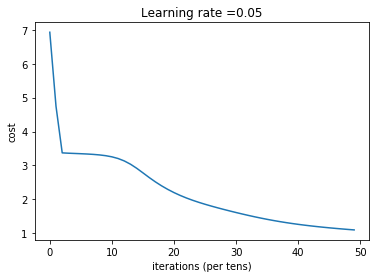

In [33]:
parameters = nn_model_L(X_train, Y_train, [28*28, 20, 10], 0.05, 500)

In [34]:
print(parameters)

{'W1': array([[-0.00735345, -0.00478324,  0.00320114, ...,  0.00863417,
        -0.00956539,  0.00014796],
       [-0.00893956,  0.00120665, -0.00286905, ..., -0.01028267,
        -0.0120223 ,  0.00582993],
       [ 0.02521577,  0.0040945 ,  0.00108665, ...,  0.00560349,
        -0.00926996,  0.00194681],
       ..., 
       [ 0.00685308,  0.00653207,  0.00621172, ...,  0.01501593,
        -0.017704  , -0.00685824],
       [ 0.00371924, -0.00335823, -0.00915596, ..., -0.00865366,
         0.00461352, -0.01580247],
       [-0.01113254,  0.01706661, -0.01977018, ...,  0.0056232 ,
        -0.00305263,  0.0046287 ]]), 'b1': array([[ 0.36700091],
       [ 0.05504054],
       [ 0.03625193],
       [ 0.11643102],
       [-0.00304428],
       [ 0.00444063],
       [ 0.27313881],
       [-0.00139683],
       [ 0.37154821],
       [ 0.02880719],
       [ 0.26598737],
       [ 0.23532528],
       [ 0.01917405],
       [ 0.08849154],
       [ 0.28631399],
       [ 0.08617533],
       [-0.00047381]

In [55]:
def predict(X, Y):
    AL, prev_results = forward_L(X, parameters)
    #use AL and Y to get the accuracy
    AL = (AL == AL.max(axis=0))*1
    m = AL.shape[1]
    accuracy = (100/m)*np.sum(np.logical_and(AL,Y))
    print(str(accuracy)+"%")

    return accuracy

In [56]:
predict(X_test, Y_test)

85.85%


85.850000000000009

In [57]:
predict(X_train, Y_train)

85.2616666667%


85.26166666666667